In [91]:
# Import necessary libraries
import os
from pyspark.sql import SparkSession
import pandas as pd # Use for data manipulation and small dataset
from matplotlib import pyplot as plt
import seaborn as sns

<h1 style="color: red"> Start the Spark Session </h1>

In [80]:
# Initialize SparkSession
spark = SparkSession.builder.appName("Temperature_Pipeline").getOrCreate()
spark

In [81]:
# Function for print break line
def print_break():
    print("=" * 50)

In [82]:
# Function for loading csv file
def csv_ingestor(file_path):
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    return df

df_2004 = csv_ingestor(file_path="/media/Personal/Project/Temperature_Pipeline/data/raw_data/data_2004.csv")
# Print the type of object the spark.read.csv returns
print(f"Returned type: {type(df_2004)}")
print_break()
# Showing the first 5 rows of the PySpark Dataframe
df_2004.show(5)


Returned type: <class 'pyspark.sql.dataframe.DataFrame'>
+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| NULL|Algiers|    1|  1|2004|          50.8|
|Africa|Algeria| NULL|Algiers|    1|  2|2004|          54.9|
|Africa|Algeria| NULL|Algiers|    1|  3|2004|          50.2|
|Africa|Algeria| NULL|Algiers|    1|  4|2004|          49.5|
|Africa|Algeria| NULL|Algiers|    1|  5|2004|          47.0|
+------+-------+-----+-------+-----+---+----+--------------+
only showing top 5 rows



<h1 style="color: yellow"> EDA </h1>

In [83]:
df_2004.printSchema()

root
 |-- Region: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- AvgTemperature: double (nullable = true)



In [84]:
# Function for showing horizontal and vertical perspectives
def show_horizontal_vertical(df):
    print(f"Number of row in the PySpark Dataframe: {df.count()}")
    print(f"Number of columns in the PySpark Dataframe: {len(df.columns)}")
    print(f"List of columns: {df.columns}")

show_horizontal_vertical(df_2004)

Number of row in the PySpark Dataframe: 118645
Number of columns in the PySpark Dataframe: 8
List of columns: ['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']


In [96]:
# Function for showing all unique values of a column in the dataset
def show_unique_values(df, column):
    unique_values = df.select(column).distinct().collect()
    print(f"Unique values in the column '{column}': {unique_values}")

show_unique_values(df_2004, "Country")

Unique values in the column 'Country': [Row(Country='Russia'), Row(Country='Senegal'), Row(Country='Sweden'), Row(Country='The Netherlands'), Row(Country='Guyana'), Row(Country='Philippines'), Row(Country='Malaysia'), Row(Country='Singapore'), Row(Country='Turkey'), Row(Country='Malawi'), Row(Country='Germany'), Row(Country='Ivory Coast'), Row(Country='Jordan'), Row(Country='France'), Row(Country='Greece'), Row(Country='Sri Lanka'), Row(Country='Taiwan'), Row(Country='Algeria'), Row(Country='Togo'), Row(Country='Slovakia'), Row(Country='Argentina'), Row(Country='Belgium'), Row(Country='Qatar'), Row(Country='Madagascar'), Row(Country='Albania'), Row(Country='Finland'), Row(Country='Nicaragua'), Row(Country='Benin'), Row(Country='Sierra Leone'), Row(Country='Peru'), Row(Country='China'), Row(Country='India'), Row(Country='Bahamas'), Row(Country='Belarus'), Row(Country='Kuwait'), Row(Country='Tajikistan'), Row(Country='Croatia'), Row(Country='Burundi'), Row(Country='Nigeria'), Row(Country

In [98]:
df_2004.select("Country").distinct().show()

+---------------+
|        Country|
+---------------+
|         Russia|
|        Senegal|
|         Sweden|
|The Netherlands|
|         Guyana|
|    Philippines|
|       Malaysia|
|      Singapore|
|         Turkey|
|         Malawi|
|        Germany|
|    Ivory Coast|
|         Jordan|
|         France|
|         Greece|
|      Sri Lanka|
|         Taiwan|
|        Algeria|
|           Togo|
|       Slovakia|
+---------------+
only showing top 20 rows



In [85]:
# Show all unique values in the dataset
# df_2004.select("Region").distinct().show()

# Function to showing all unique values in the dataset with its frequency
def show_unique_values_frequency(df, column):
    df.groupBy(column).count().show()

show_unique_values_frequency(df_2004, "Region")
# show_unique_values(df_2004, "Country") 
# show_unique_values(df_2004, "State")


+--------------------+-----+
|              Region|count|
+--------------------+-----+
|              Europe|15512|
|              Africa|10614|
|       North America|63239|
|         Middle East| 5124|
|South/Central Ame...| 9150|
|                Asia|12810|
|Australia/South P...| 2196|
+--------------------+-----+



<h1 style="color: yellow"> Visualization </h1>

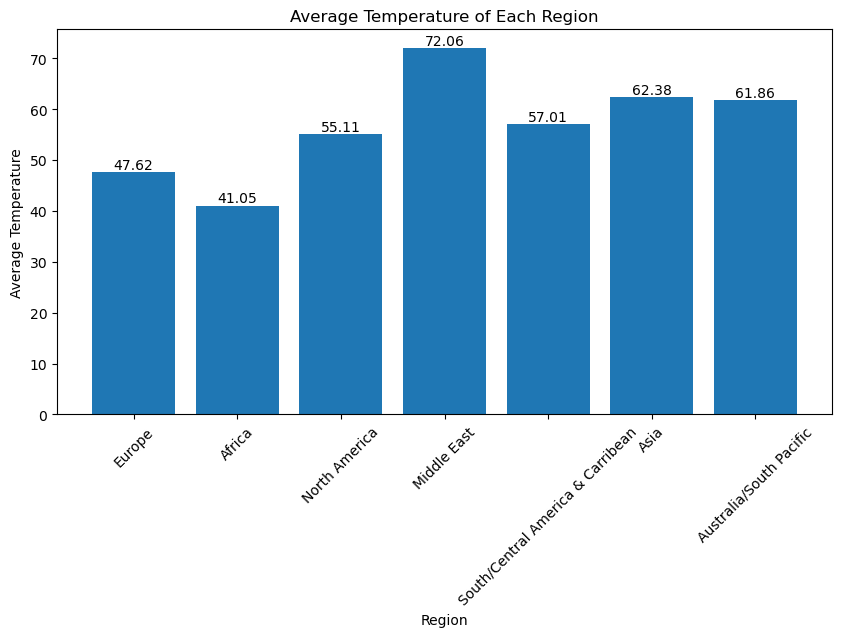

In [86]:
# Function to visualize the yearly average temperature of each region in the dataset
def visualize_yearly_average_region_temp(df):
    region_avg_temp = df.groupBy("Region").avg("AvgTemperature")
    region_avg_temp = region_avg_temp.toPandas()
    # Visualize
    plt.figure(figsize=(10, 5))
    bars = plt.bar(region_avg_temp["Region"], region_avg_temp["avg(AvgTemperature)"])
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2, # x-coordinate
            bar.get_height(), # y-coordinate
            round(bar.get_height(), 2), # value text (rounded to 2 decimal places)
            ha="center", # horizontal alignment
            va="bottom" # vertical alignment
        )
    plt.xlabel("Region")
    plt.ylabel("Average Temperature")
    plt.title("Average Temperature of Each Region")
    plt.xticks(rotation=45)
    plt.show()

    # Show the plot
    plt.show()

visualize_yearly_average_region_temp(df_2004)

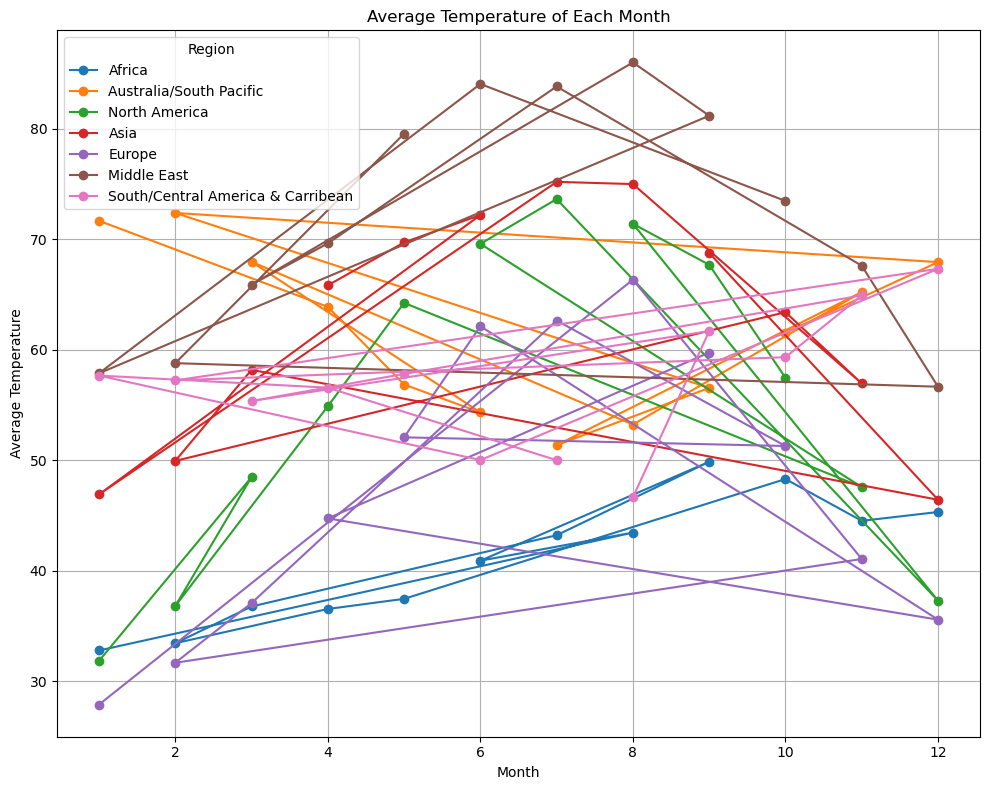

In [87]:
month_avg_temp = df_2004.groupBy("Region", "Month").avg("AvgTemperature")
month_avg_temp = month_avg_temp.toPandas()
# Visualize
plt.figure(figsize=(10, 8))
for region in month_avg_temp["Region"].unique():
    region_data = month_avg_temp[month_avg_temp["Region"] == region]
    plt.plot(region_data["Month"], 
             region_data["avg(AvgTemperature)"], 
             marker="o", 
             label=region)
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.legend(title="Region")
plt.title("Average Temperature of Each Month")
plt.grid()
plt.tight_layout()
plt.show()

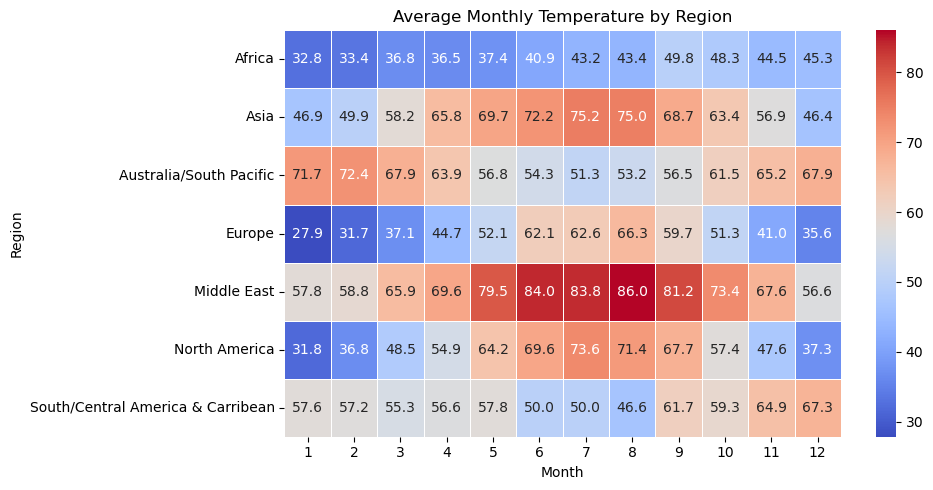

In [103]:
# Function to visualize the monthly average temperature of each region in the dataset
def visualize_monthly_average_region_temp(df):
    region_month_avg_temp = df.groupBy("Region", "Month").avg("AvgTemperature")
    region_month_avg_temp = region_month_avg_temp.toPandas()
    heatmap_data = region_month_avg_temp.pivot(index="Region", columns="Month", values="avg(AvgTemperature)")
    # Visualize
    plt.figure(figsize=(10, 5))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
    # Add labels and title
    plt.title("Average Monthly Temperature by Region")
    plt.xlabel("Month")
    plt.ylabel("Region")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Show the plot
    plt.show()

visualize_monthly_average_region_temp(df_2004)

<h1 style="color: red"> Stop the Spark Session </h1>

In [88]:
# spark.stop()

In [89]:
# # Initialize Spark session
# spark = SparkSession.builder \
#     .appName("SimpleSparkApp") \
#     .getOrCreate()

# # Load a CSV file
# df = spark.read.csv("/media/Personal/Project/Temperature_Pipeline/data/raw_data/data_2004.csv", header=True, inferSchema=True)

# # Show the data
# df.show()

# # Filter the data
# filtered_df = df.filter(df['Region'] == 'Africa')
# filtered_df.show()

# # Stop the Spark session
# spark.stop()